In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Reading data
data = pd.read_csv('ex1data1.txt',header=None)

In [5]:
#Visualizing data
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
#Describing data
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Vs Population')

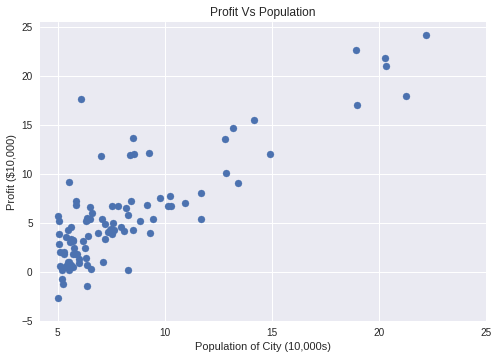

In [7]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Vs Population")

In [0]:
def computeCost(X,y,theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [0]:
data_n=data.values

In [0]:
m=len(data_n[:,-1])

In [0]:
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)

In [0]:
y=data_n[:,1].reshape(m,1)

In [0]:
theta=np.zeros((2,1))

In [14]:
print(computeCost(X,y,theta))

32.072733877455676


In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
  m = len(y)
  J_history = []
  for i in range(num_iters):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(),(predictions - y))
    descent = alpha * (1/m) * error
    theta -= descent
    J_history.append(computeCost(X,y,theta))
    
  return theta,J_history

In [0]:
alpha = 0.01
num_iters = 1500

In [0]:
theta , J_history = gradientDescent(X,y,theta,alpha,num_iters)

In [18]:
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
#Generating axes values
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)),dtype=np.float64)

In [0]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

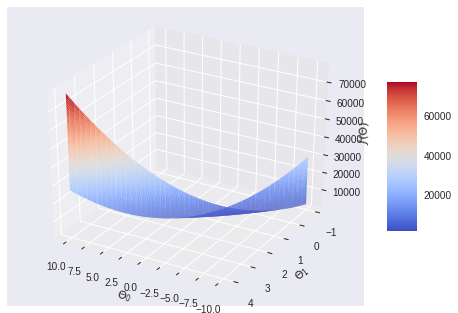

In [22]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

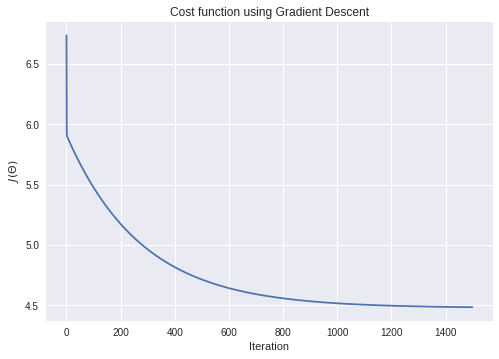

In [30]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

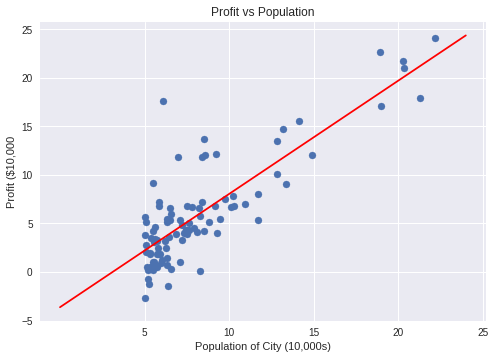

In [32]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

In [0]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [34]:
predict1=predict(np.array([1,3.5]),theta)*10000

print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [35]:
predict2=predict(np.array([1,7]),theta)*10000

print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $45342.0
